# Spotify Top 100 Songs 2018

**By:** Jonathan Murthy

**Data:** The 100 most played songs from 2018 by the music streaming platform Spotify. Each song includes names, artists, Spotify ID, and audio features derived from the Spotify Web API. The audio features are derived from a propriety algorithm similar to the Music Genome Project which meaures aspects of a song on a scale of 0.0 to 1.0.   
https://www.kaggle.com/nadintamer/top-spotify-tracks-of-2018#top2018.csv

**keywords:** Spotify, audio features, music, bivariate analysis, statistics, music genome

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('top2018.csv')
df = df.drop(['id'], axis=1)

In [4]:
df.head()

,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973.0,4.0
1,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606.0,4.0
2,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147.0,4.0
3,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.112,0.439,140.124,221440.0,4.0
4,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.396,0.350,91.030,217925.0,4.0


# Exploratory Data Analysis

In [5]:
# Function that takes a column name, counts the number of occurences each unique value has, and creates a bar chart. 
def analysis(column_name):
    x = df.groupby(column_name)['name'].count().sort_values(ascending=False)
    x.plot(kind='bar', figsize=(25,15))
    plt.ylabel('songs')
    plt.title(column_name)
    plt.show()
    
    x.hist(figsize=(20,10))
    plt.show()
    
    return x.head(20)

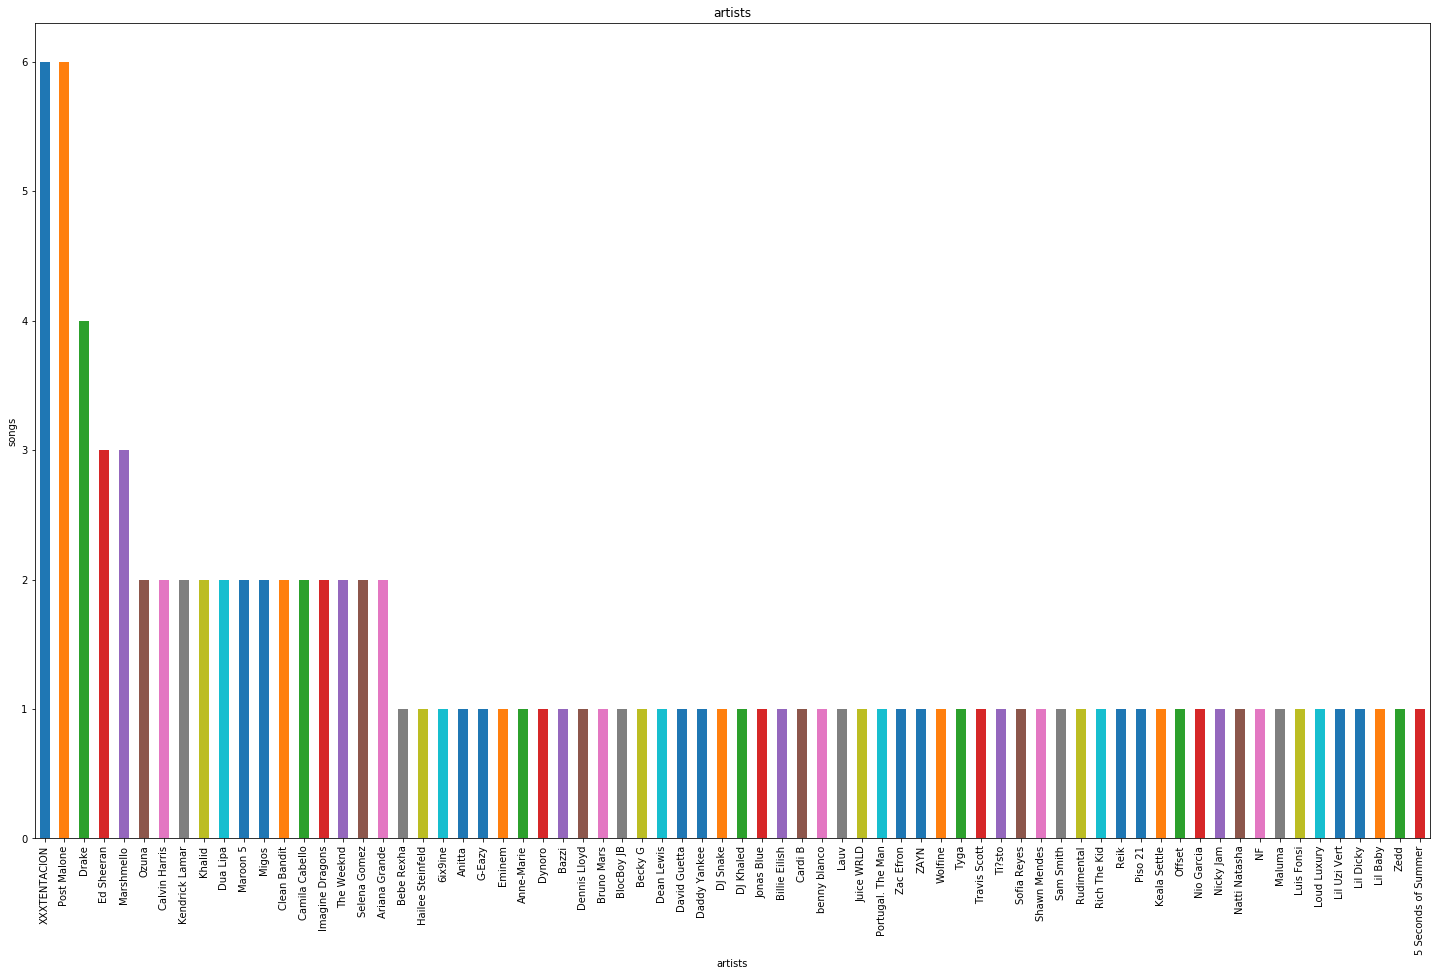

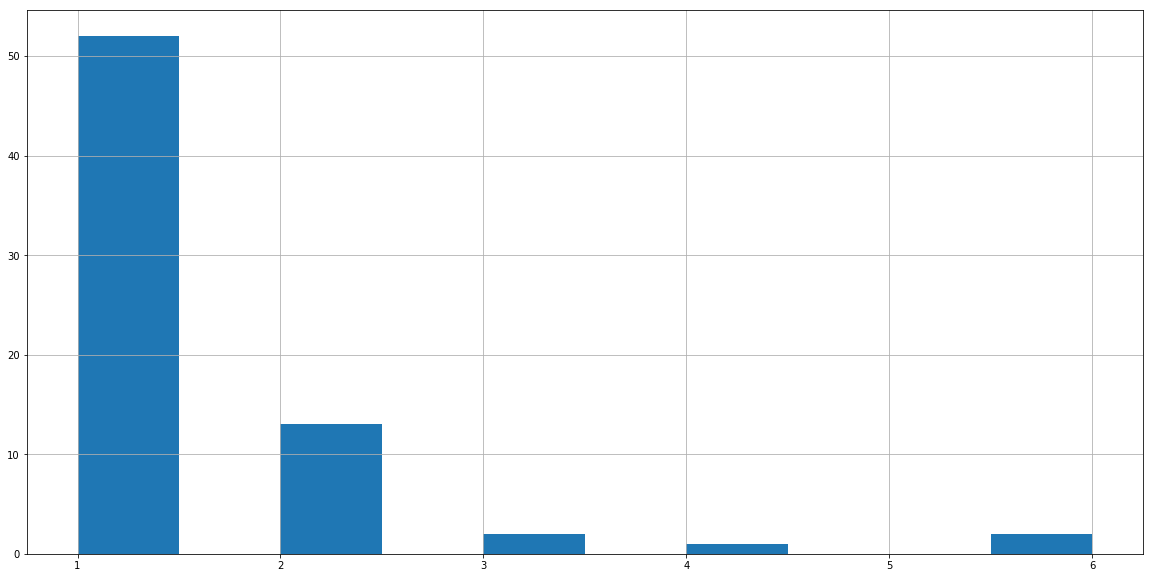

artists
XXXTENTACION        6
Post Malone         6
Drake               4
Ed Sheeran          3
Marshmello          3
Ozuna               2
Calvin Harris       2
Kendrick Lamar      2
Khalid              2
Dua Lipa            2
Maroon 5            2
Migos               2
Clean Bandit        2
Camila Cabello      2
Imagine Dragons     2
The Weeknd          2
Selena Gomez        2
Ariana Grande       2
Bebe Rexha          1
Hailee Steinfeld    1
Name: name, dtype: int64

In [6]:
analysis('artists')

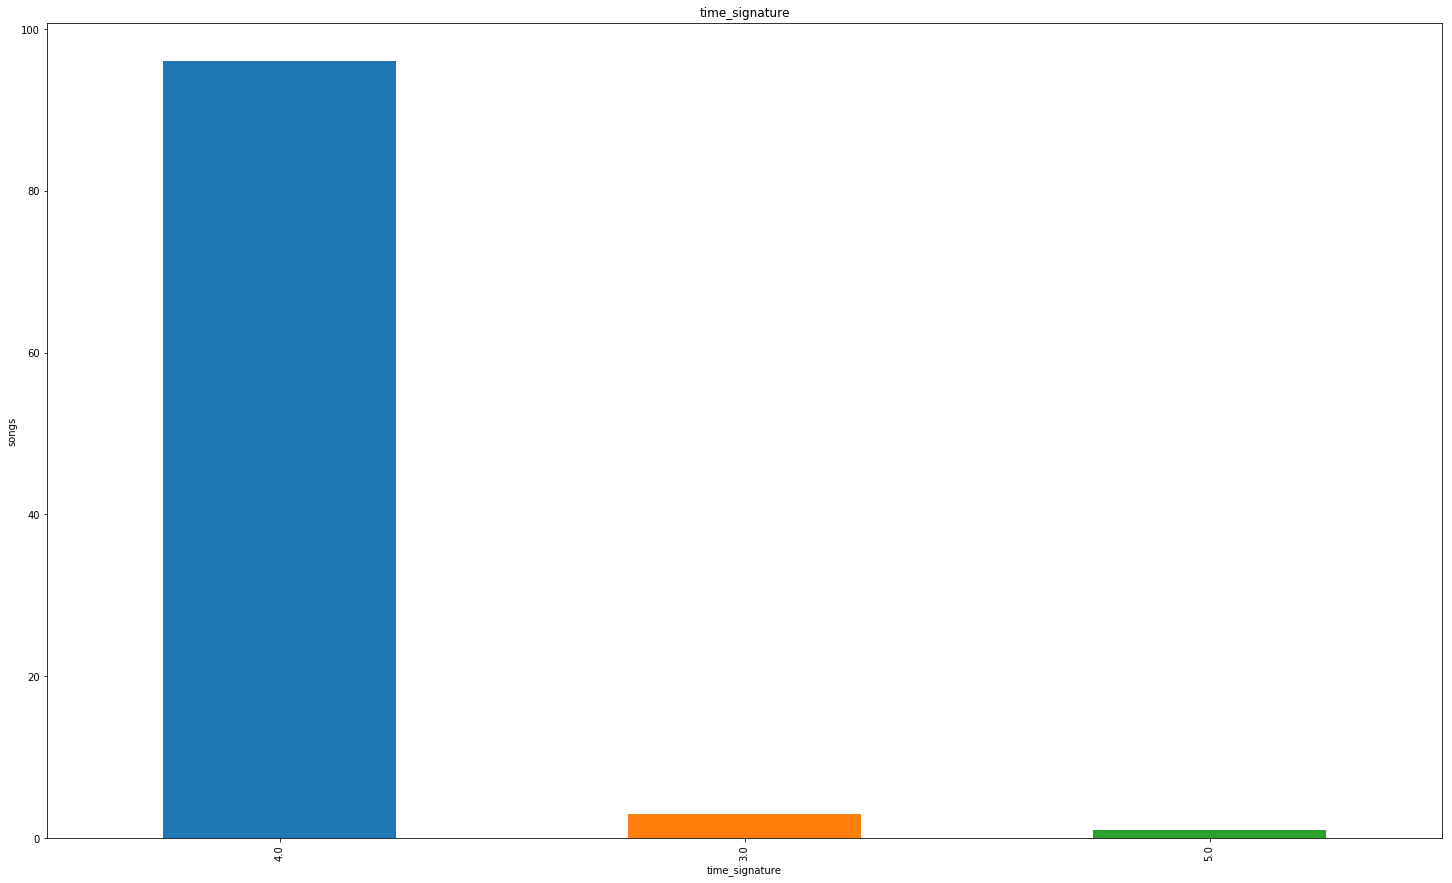

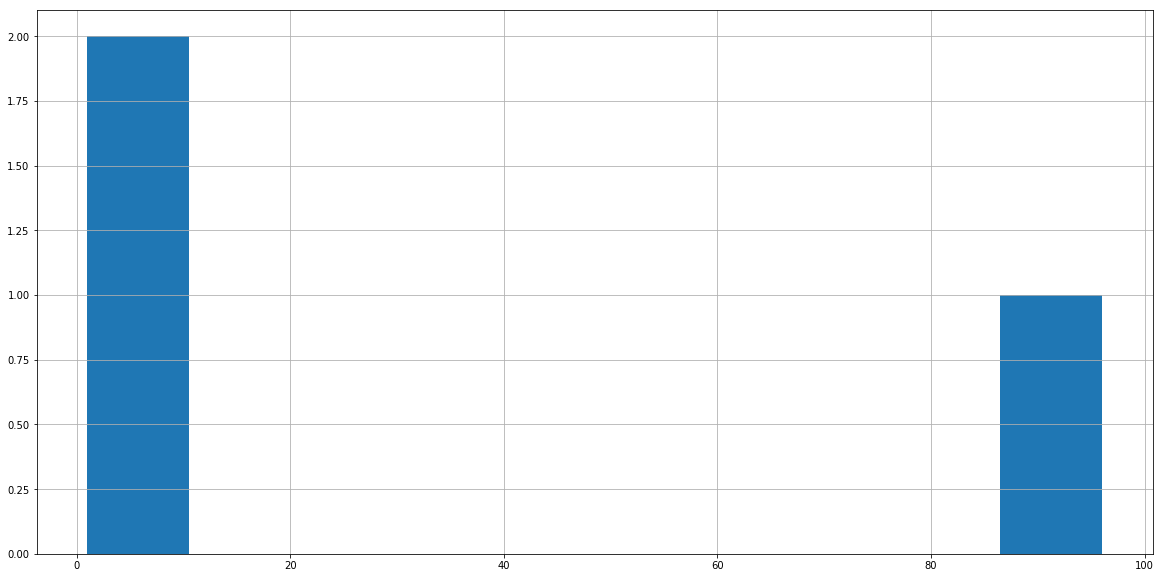

time_signature
4.0    96
3.0     3
5.0     1
Name: name, dtype: int64

In [7]:
analysis('time_signature')

In [8]:
# This function runs a .describe() method on each audio feature and returns the basic 
# statistics and the song and artist associated with the min and max value.

def stats(column_name):
    print(df[column_name].describe())
    print()
    max_val = df[df[column_name] == max(df[column_name])]
    min_val = df[df[column_name] == min(df[column_name])]
    print('max:', max_val[['name', 'artists']])
    print()
    print('min:', min_val[['name', 'artists']])
    return 

**danceability:** *'Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.' - Spotify*

In [9]:
stats('danceability')

count    100.00000
mean       0.71646
std        0.13107
min        0.25800
25%        0.63550
50%        0.73300
75%        0.79825
max        0.96400
Name: danceability, dtype: float64

max:           name   artists
91  Yes Indeed  Lil Baby

min:                            name artists
98  Dusk Till Dawn - Radio Edit    ZAYN


**energy:** *'Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.' - Spotify*

In [10]:
stats('energy')

count    100.000000
mean       0.659060
std        0.145067
min        0.296000
25%        0.562000
50%        0.678000
75%        0.772250
max        0.909000
Name: energy, dtype: float64

max:              name artists
12  Nice For What   Drake

min:                     name        artists
80  lovely (with Khalid)  Billie Eilish


**key:** *'The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.' - Spotify*

In [11]:

# the key column consisted of float64 values. I converted them to their corespondng musical notation
# for readability
dict_key ={0.0:'C', 1.0:'C#/Db', 2.0:'D', 3.0:'D#/Eb', 4.0:'E',
          5.0:'F', 6.0:'F#/Gb', 7.0:'G', 8.0:'G#/Ab', 9.0:'A',
          10.0:'A#/Bb', 11.0:'B'}


df['key'] = df['key'].map(dict_key)
df['key']
    



0         G
1     G#/Ab
2         F
3     G#/Ab
4     C#/Db
5     A#/Bb
6         F
7         A
8         G
9         A
10        D
11    F#/Gb
12    G#/Ab
13        C
14        G
15    G#/Ab
16        A
17        A
18        A
19    A#/Bb
20        C
21        B
22        E
23        G
24        A
25    C#/Db
26    F#/Gb
27    A#/Bb
28        C
29    G#/Ab
      ...  
70    G#/Ab
71    C#/Db
72        D
73        D
74        D
75        E
76    F#/Gb
77    C#/Db
78        D
79        B
80        E
81        D
82    C#/Db
83    F#/Gb
84    G#/Ab
85        A
86    C#/Db
87        A
88        E
89    D#/Eb
90        B
91        F
92        A
93        D
94        G
95    A#/Bb
96    D#/Eb
97        C
98        B
99        B
Name: key, Length: 100, dtype: object

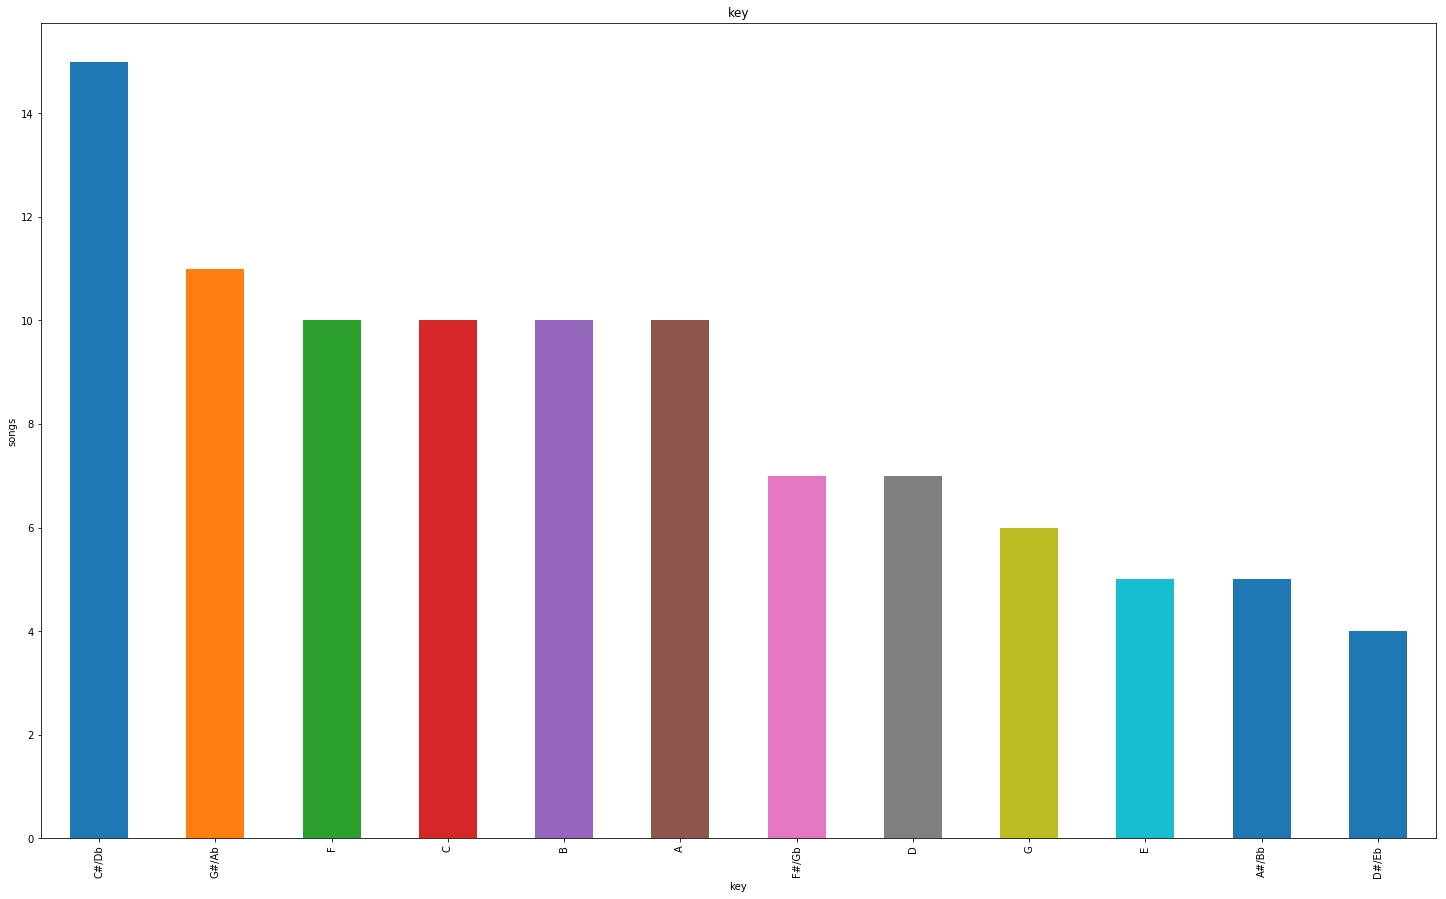

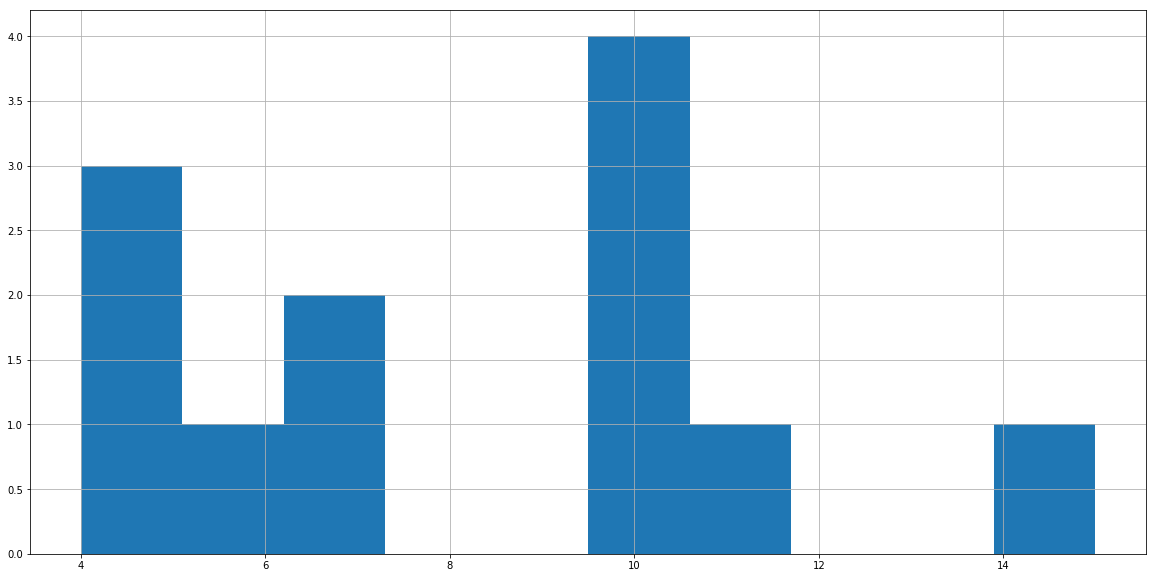

key
C#/Db    15
G#/Ab    11
F        10
C        10
B        10
A        10
F#/Gb     7
D         7
G         6
E         5
A#/Bb     5
D#/Eb     4
Name: name, dtype: int64

In [12]:
analysis('key')

In [13]:
stats('key')

count       100
unique       12
top       C#/Db
freq         15
Name: key, dtype: object

max:                                                  name           artists
1                                                SAD!      XXXTENTACION
3                        Psycho (feat. Ty Dolla $ign)       Post Malone
12                                      Nice For What             Drake
15                           All The Stars (with SZA)    Kendrick Lamar
29                                            Perfect        Ed Sheeran
32                                       I Fall Apart       Post Malone
40                           River (feat. Ed Sheeran)            Eminem
42                                         SICKO MODE      Travis Scott
53                  Freaky Friday (feat. Chris Brown)         Lil Dicky
70  Let Me Go (with Alesso, Florida Georgia Line &...  Hailee Steinfeld
84                Perfect Duet (Ed Sheeran & Beyonc?)        Ed Sheeran

min:                                name

**loudness:** *'The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.' - Spotify*

In [14]:
stats('loudness')

count    100.000000
mean      -5.677640
std        1.777577
min      -10.109000
25%       -6.650500
50%       -5.566500
75%       -4.363750
max       -2.384000
Name: loudness, dtype: float64

max:       name     artists
9  FRIENDS  Marshmello

min:                     name        artists
80  lovely (with Khalid)  Billie Eilish


**speechiness** *'Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.' -Spotify*

In [15]:
stats('speechiness')

count    100.000000
mean       0.115569
std        0.104527
min        0.023200
25%        0.045350
50%        0.074950
75%        0.137000
max        0.530000
Name: speechiness, dtype: float64

max:           name   artists
91  Yes Indeed  Lil Baby

min:        name     artists
29  Perfect  Ed Sheeran


**acoustincness** *'A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.' -Spotify*

In [16]:
stats('acousticness')

count    100.000000
mean       0.195701
std        0.220946
min        0.000282
25%        0.040225
50%        0.109000
75%        0.247750
max        0.934000
Name: acousticness, dtype: float64

max:                     name        artists
80  lovely (with Khalid)  Billie Eilish

min:        name         artists
82  HUMBLE.  Kendrick Lamar


**instrumentalness:** *'Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.' -Spotify*

In [17]:
stats('instrumentalness')

count    100.000000
mean       0.001584
std        0.013449
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000031
max        0.134000
Name: instrumentalness, dtype: float64

max:        name          artists
43  Thunder  Imagine Dragons

min:                                                  name              artists
3                        Psycho (feat. Ty Dolla $ign)          Post Malone
5                                          Better Now          Post Malone
6                                           I Like It              Cardi B
8                                               IDGAF             Dua Lipa
9                                             FRIENDS           Marshmello
11                                       Lucid Dreams           Juice WRLD
13                     Girls Like You (feat. Cardi B)             Maroon 5
14                                         The Middle                 Zedd
20  These Days (feat. Jess Glynne, Macklemore & Da...   

**liveness:** *'Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.' -Spotify*

In [18]:
stats('liveness')

count    100.000000
mean       0.158302
std        0.111662
min        0.021500
25%        0.094675
50%        0.118500
75%        0.170750
max        0.636000
Name: liveness, dtype: float64

max:         name artists
44  Me Niego    Reik

min:                                name     artists
46  Finesse (Remix) [feat. Cardi B]  Bruno Mars


**valence:** *'A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).' - Spotify*

In [19]:
stats('valence')

count    100.000000
mean       0.484443
std        0.206145
min        0.079600
25%        0.341000
50%        0.470500
75%        0.641500
max        0.931000
Name: valence, dtype: float64

max:             name     artists
25  Shape of You  Ed Sheeran

min:          name       artists
33  Nevermind  Dennis Lloyd


**tempo:** *'The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.' - Spotify*

In [20]:
stats('tempo')

count    100.000000
mean     119.904180
std       28.795984
min       64.934000
25%       95.730750
50%      120.116000
75%      140.022750
max      198.075000
Name: tempo, dtype: float64

max:                              name artists
85  Coraz?n (feat. Nego do Borel)  Maluma

min:        name       artists
38  changes  XXXTENTACION


**duration:** *'The duration of the track in milliseconds.' - Spotify*

In [21]:
# Duration has been converted into minutes

duration = df['duration_ms'] / 1000
duration = round(duration/60, 2) 
duration

0     3.32
1     2.78
2     3.64
3     3.69
4     3.63
5     3.85
6     4.22
7     3.58
8     3.63
9     3.38
10    3.62
11    4.00
12    3.51
13    3.93
14    3.08
15    3.87
16    3.43
17    2.89
18    2.25
19    3.02
20    3.51
21    6.97
22    2.18
23    3.39
24    3.49
25    3.90
26    3.36
27    2.74
28    1.99
29    4.39
      ... 
70    2.91
71    2.72
72    3.52
73    4.60
74    4.48
75    3.79
76    3.67
77    3.36
78    3.88
79    2.92
80    3.34
81    3.17
82    2.95
83    2.94
84    4.33
85    3.08
86    3.38
87    3.78
88    3.22
89    3.29
90    3.56
91    2.37
92    3.29
93    3.91
94    1.59
95    3.62
96    3.43
97    4.33
98    3.98
99    3.27
Name: duration_ms, Length: 100, dtype: float64

In [22]:
duration.describe()

count    100.000000
mean       3.420100
std        0.666863
min        1.590000
25%        3.080000
50%        3.420000
75%        3.690000
max        6.970000
Name: duration_ms, dtype: float64

In [23]:
stats('duration_ms')

count       100.000000
mean     205206.780000
std       40007.893404
min       95467.000000
25%      184680.000000
50%      205047.500000
75%      221493.250000
max      417920.000000
Name: duration_ms, dtype: float64

max:                name     artists
21  Te Bot? - Remix  Nio Garcia

min:                                   name       artists
94  Everybody Dies In Their Nightmares  XXXTENTACION


**time_signature:** *'An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).' - Spotify*

In [24]:
stats('time_signature')

count    100.00
mean       3.98
std        0.20
min        3.00
25%        4.00
50%        4.00
75%        4.00
max        5.00
Name: time_signature, dtype: float64

max:           name    artists
97  No Brainer  DJ Khaled

min:                                    name     artists
29                              Perfect  Ed Sheeran
49                     Call Out My Name  The Weeknd
84  Perfect Duet (Ed Sheeran & Beyonc?)  Ed Sheeran


In [25]:
def col_scatter(col_name):    
    
    plt.figure(figsize=(11,5))
    plt.subplot(1,2,1)
    plt.scatter(df[col_name], df['danceability'])
    plt.ylabel('danceability')
    plt.xlabel(col_name)
    plt.subplot(1,2,2)
    plt.scatter(df[col_name], df['energy'])
    plt.ylabel('energy')
    plt.xlabel(col_name)
    
    plt.figure(figsize=(11,5))
    plt.subplot(1,2,2)
    plt.scatter(df[col_name], df['key'])
    plt.ylabel('key')
    plt.xlabel(col_name)
    plt.subplot(1,2,1)
    plt.scatter(df[col_name], df['loudness'])
    plt.ylabel('loudness')
    plt.xlabel(col_name)
    
    plt.figure(figsize=(11,5))
    plt.subplot(1,2,2)
    plt.scatter(df[col_name], df['speechiness'])
    plt.ylabel('speechiness')
    plt.xlabel(col_name)
    plt.subplot(1,2,1)
    plt.scatter(df[col_name], df['acousticness'])
    plt.ylabel('acousticness')
    plt.xlabel(col_name)
    
    plt.figure(figsize=(11,5))
    plt.subplot(1,2,2)
    plt.scatter(df[col_name], df['instrumentalness'])
    plt.ylabel('instrumentalness')
    plt.xlabel(col_name)
    plt.subplot(1,2,1)
    plt.scatter(df[col_name], df['liveness'])
    plt.ylabel('liveness')
    plt.xlabel(col_name)

    plt.figure(figsize=(11,5))
    plt.subplot(1,2,2)
    plt.scatter(df[col_name], df['valence'])
    plt.ylabel('valence')
    plt.xlabel(col_name)
    plt.subplot(1,2,1)
    plt.scatter(df[col_name], df['tempo'])
    plt.ylabel('tempo')
    plt.xlabel(col_name)
    
    plt.figure(figsize=(11,5))
    plt.subplot(1,2,2)
    plt.scatter(df[col_name], duration)
    plt.ylabel('duration_ms')
    plt.xlabel(col_name)
    plt.subplot(1,2,1)
    plt.scatter(df[col_name], df['time_signature'])
    plt.ylabel('time_signature')
    plt.xlabel(col_name)
    

    plt.show()








In [31]:
columns = df.columns.drop(['name', 'artists'])

danceability


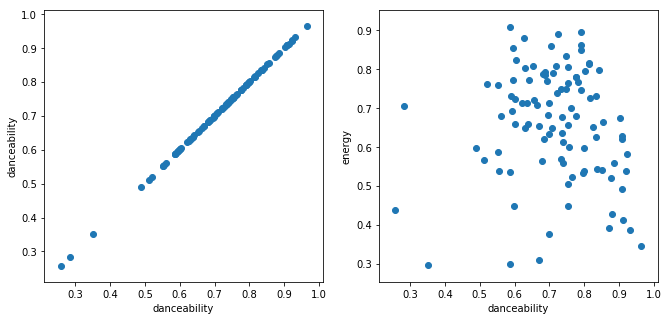

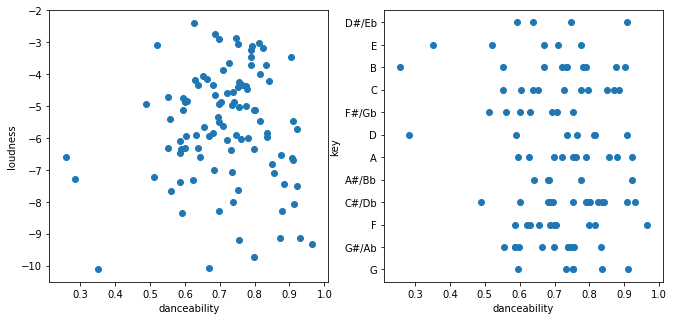

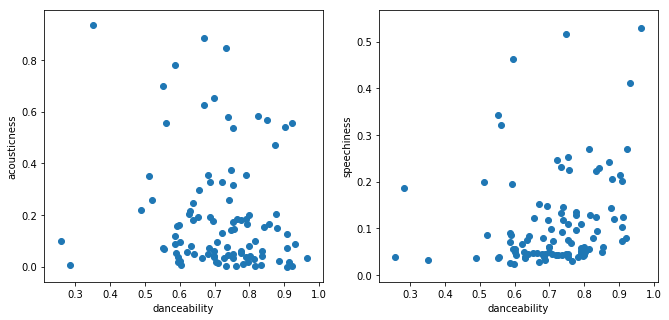

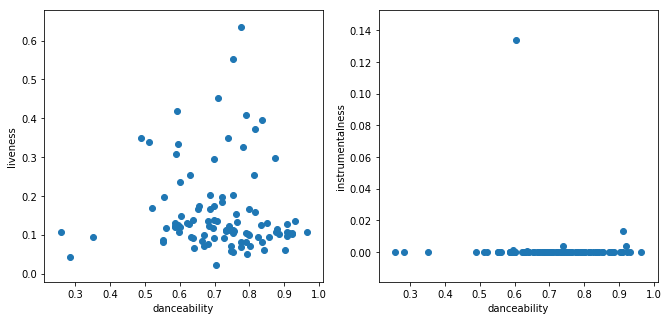

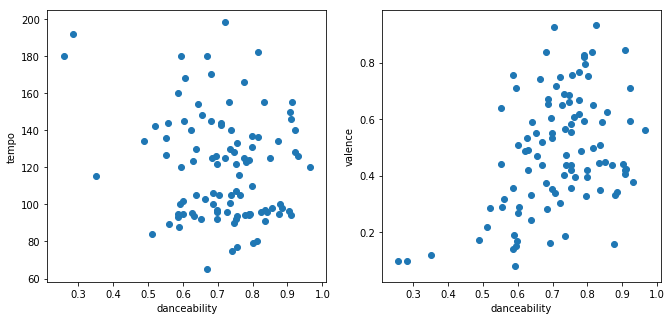

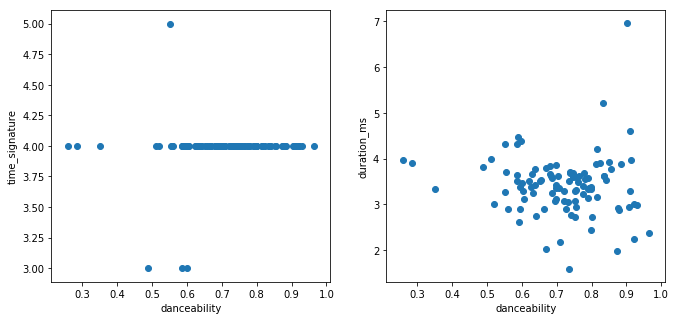

energy


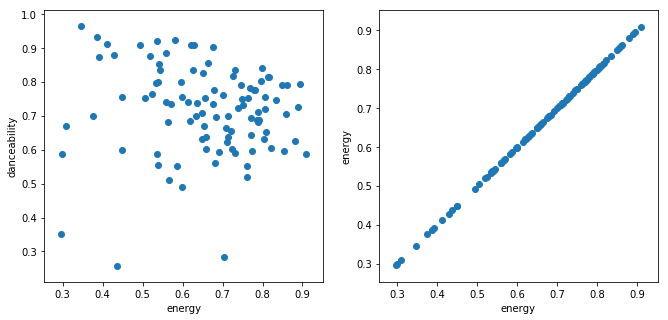

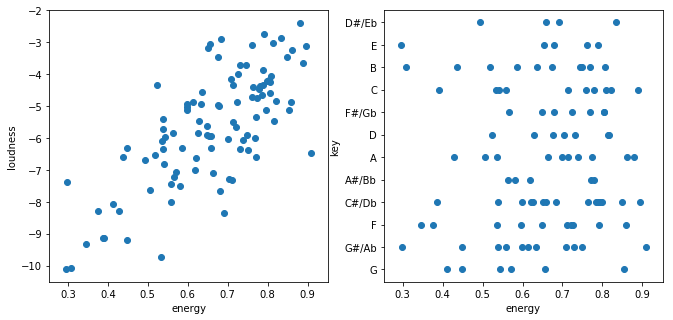

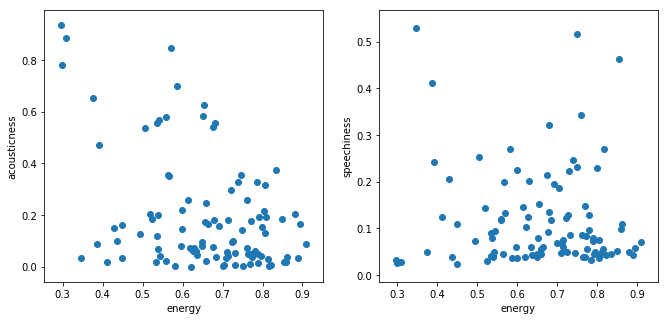

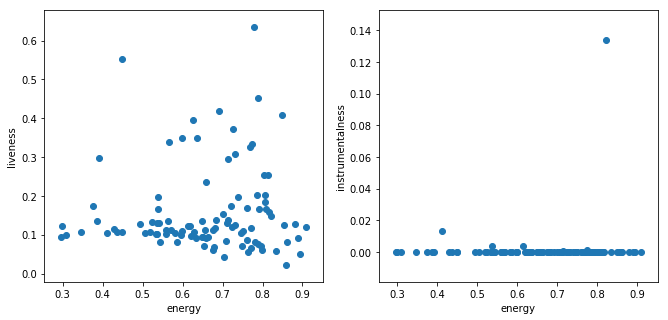

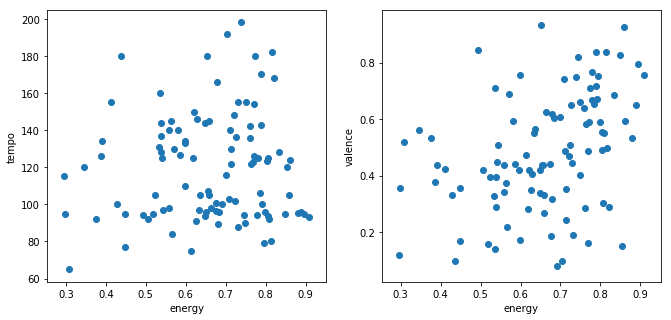

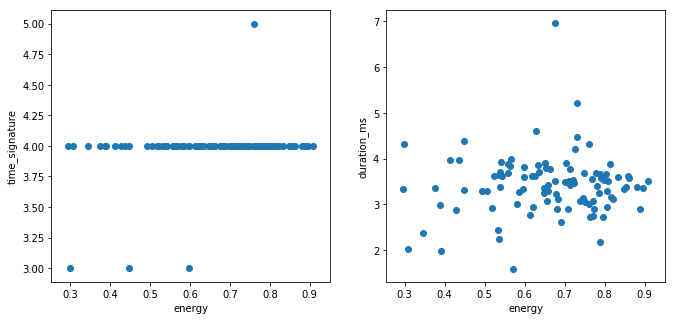

key


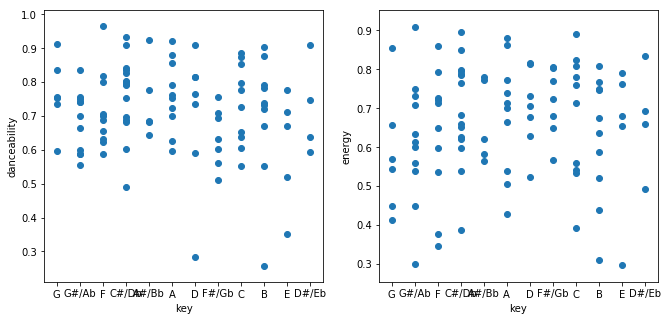

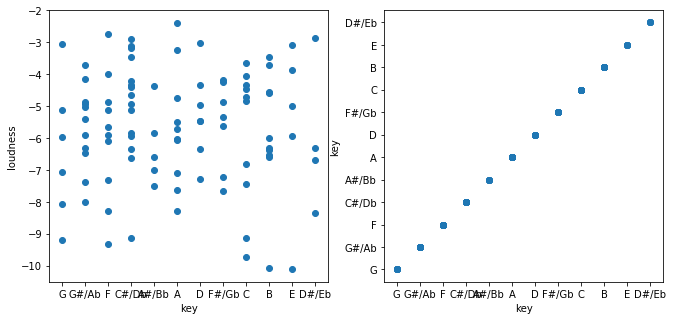

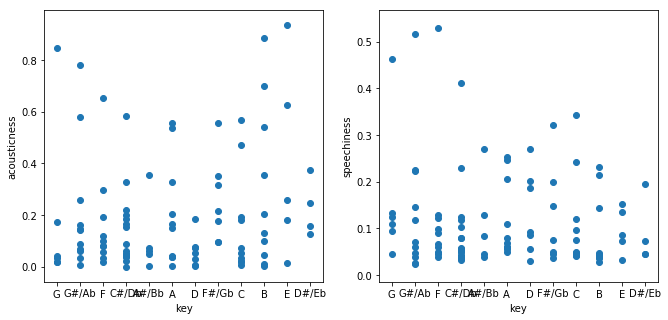

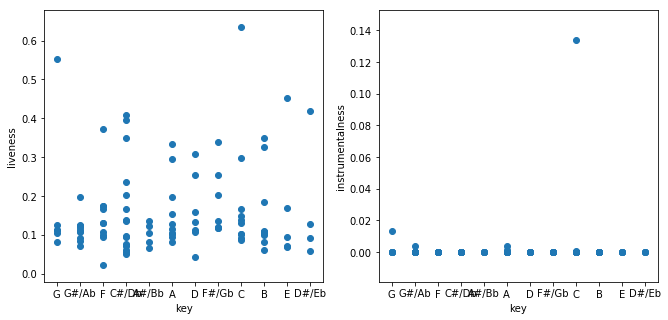

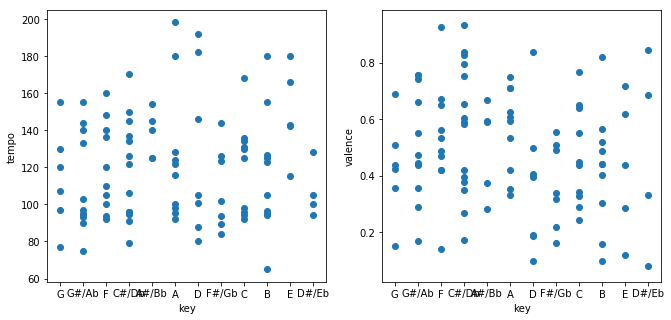

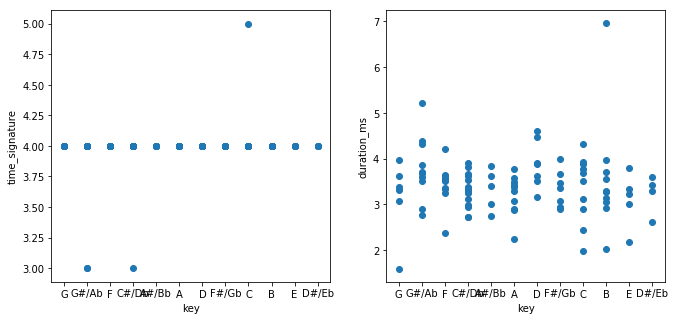

loudness


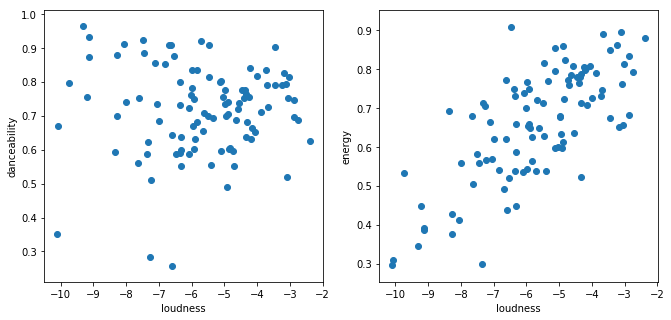

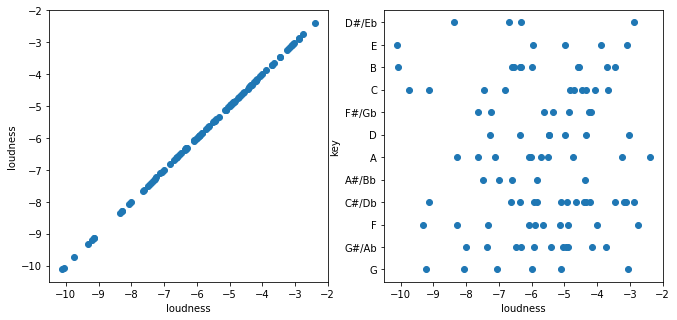

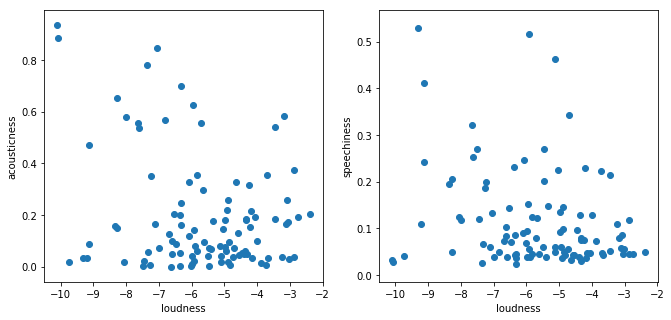

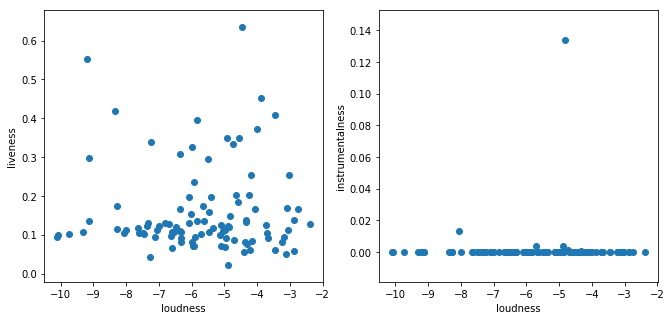

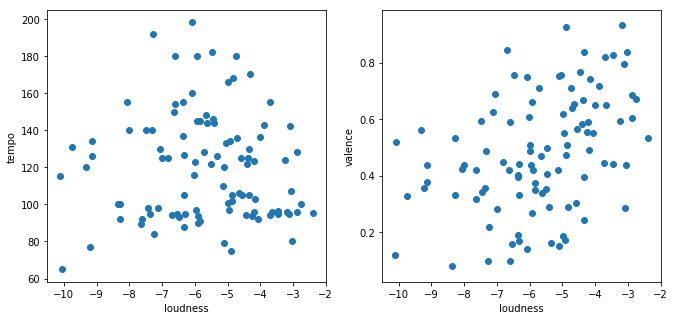

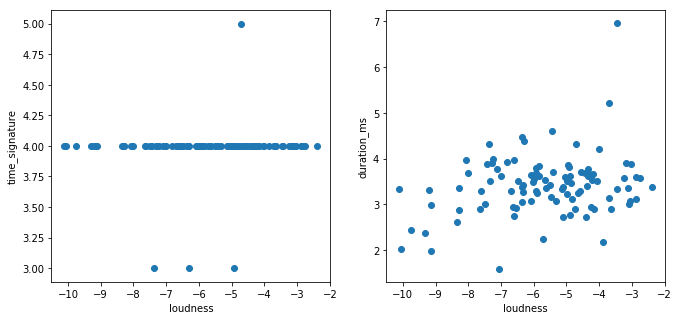

mode


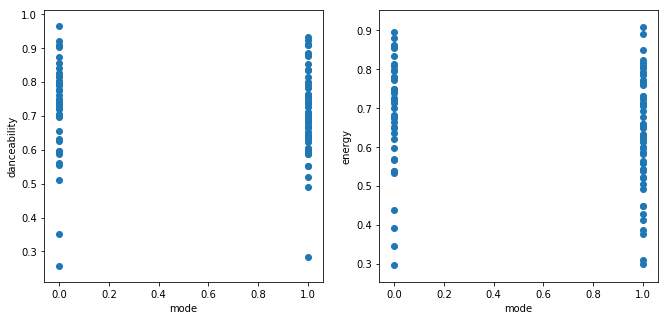

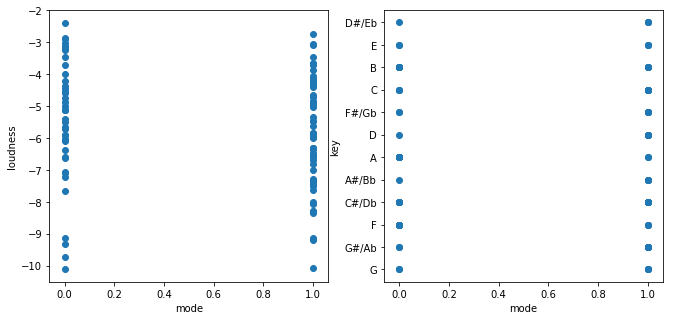

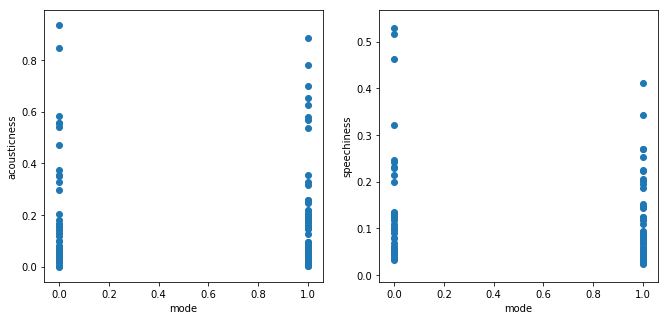

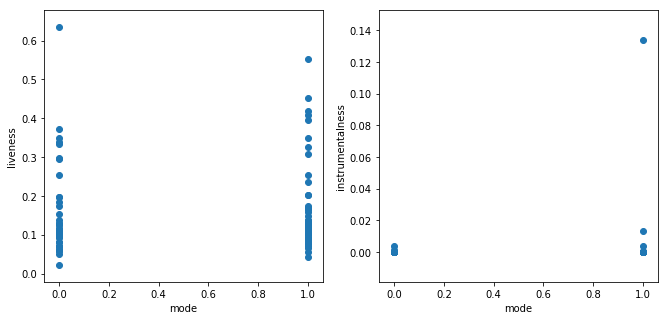

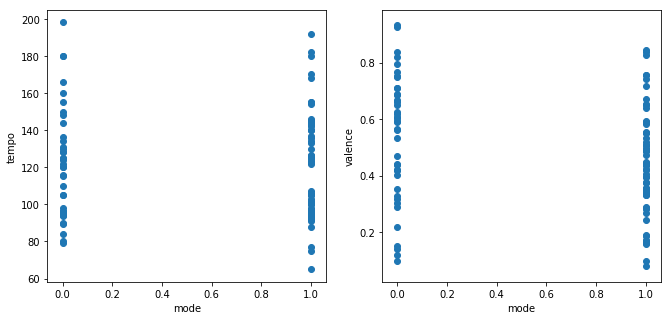

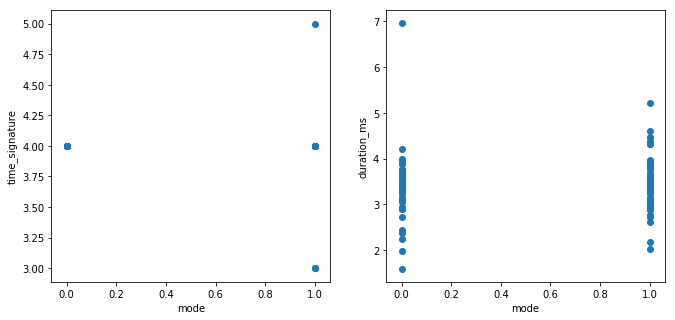

speechiness


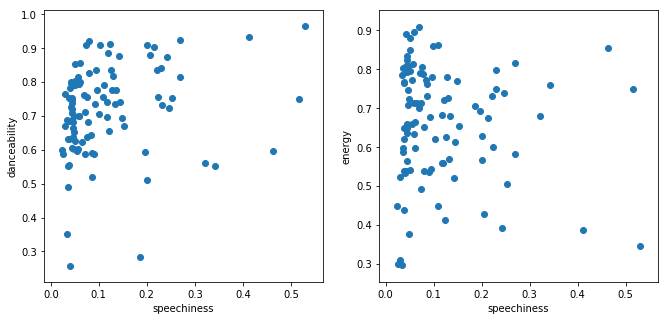

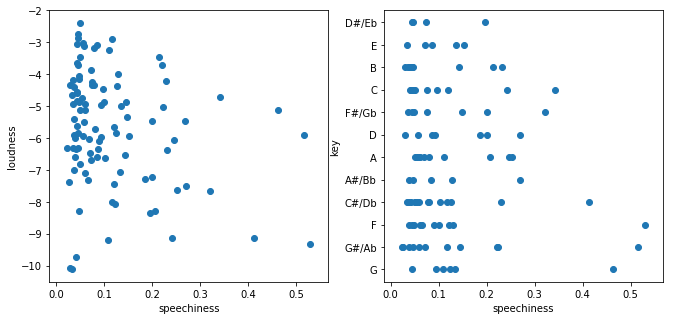

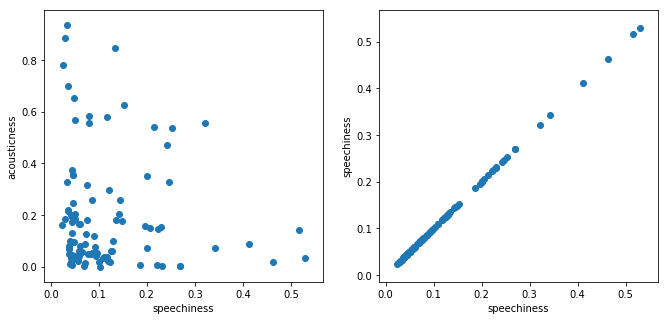

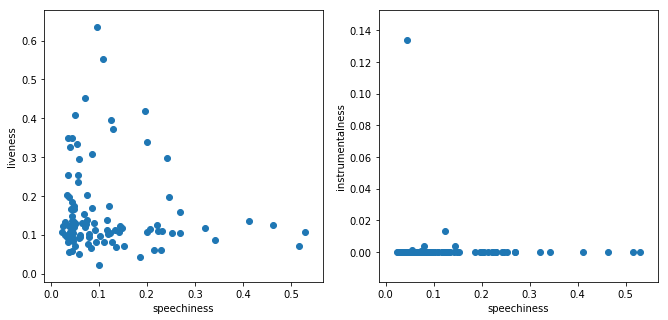

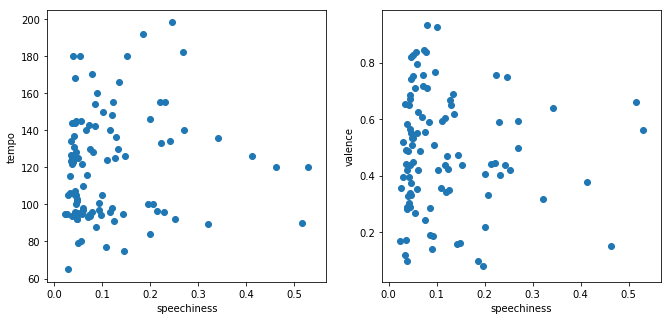

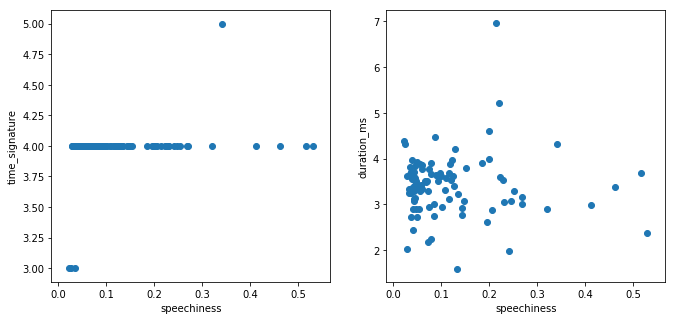

acousticness


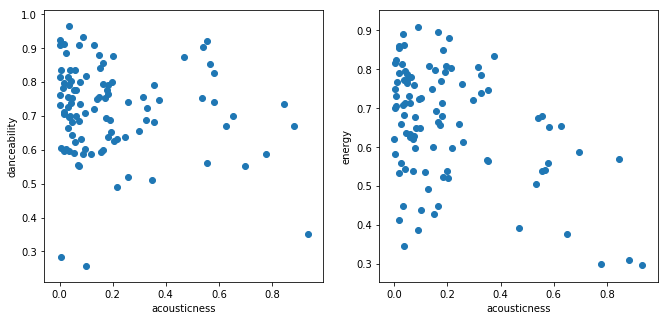

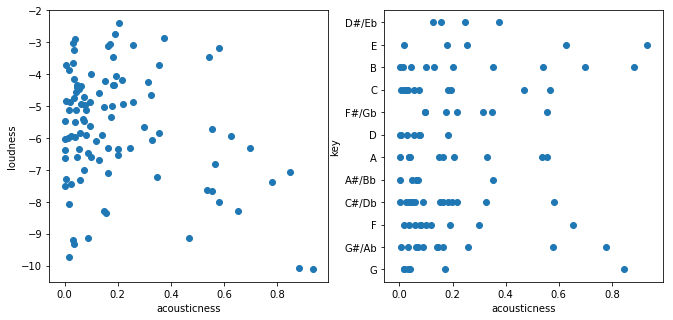

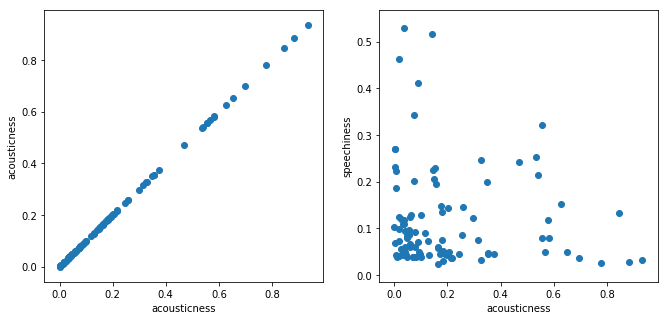

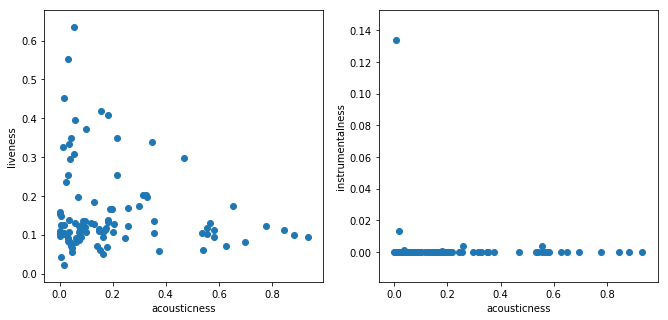

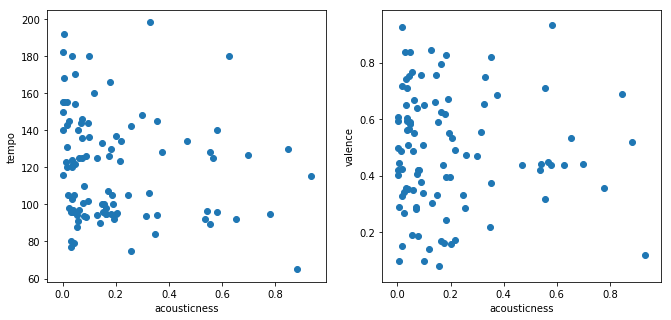

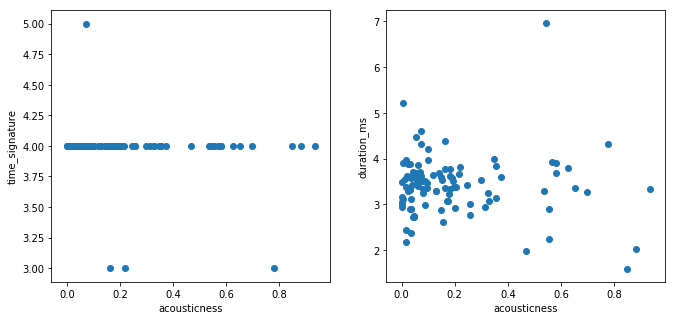

instrumentalness


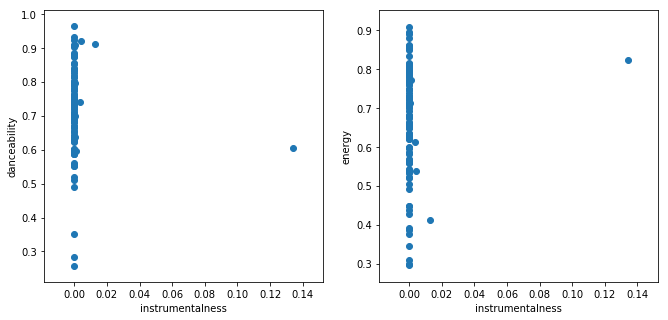

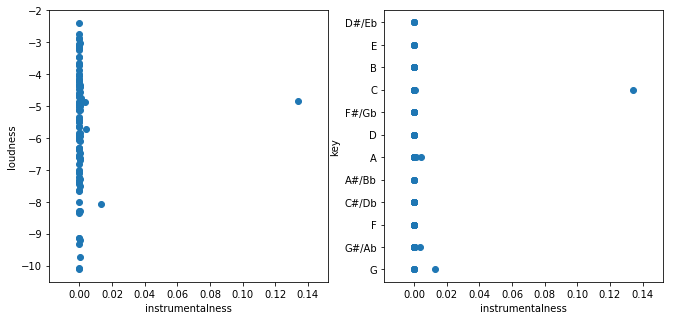

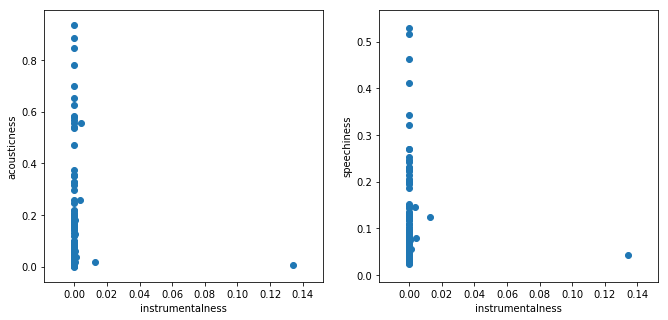

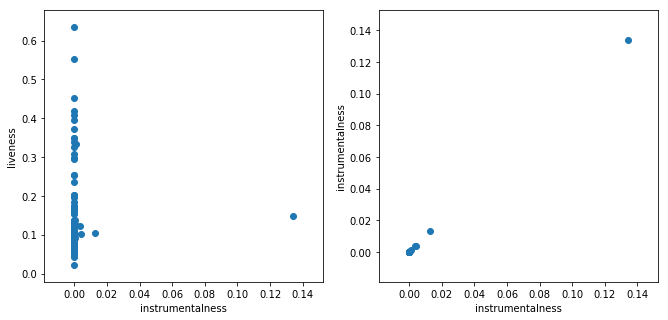

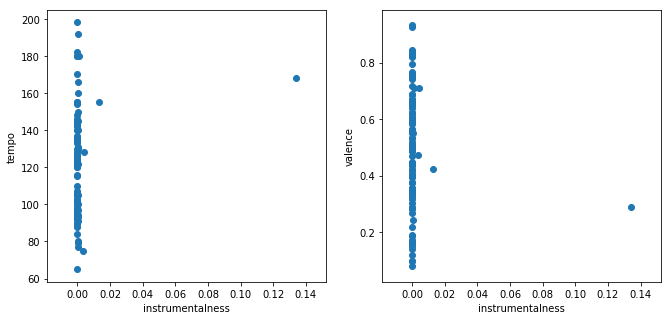

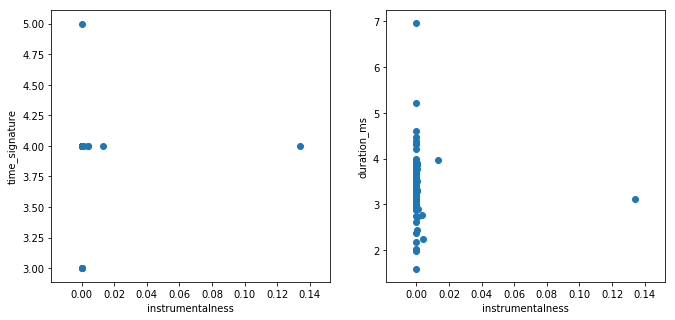

liveness


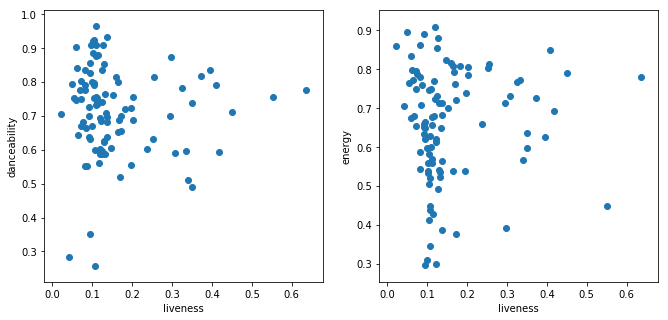

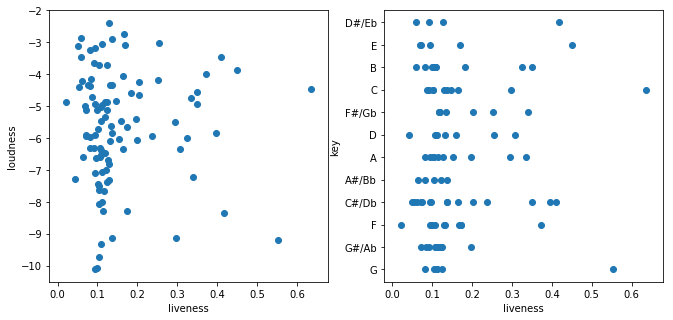

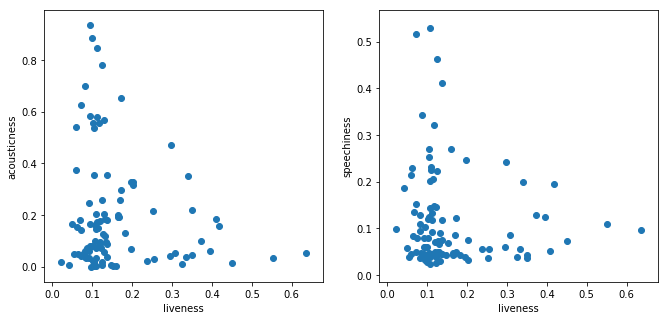

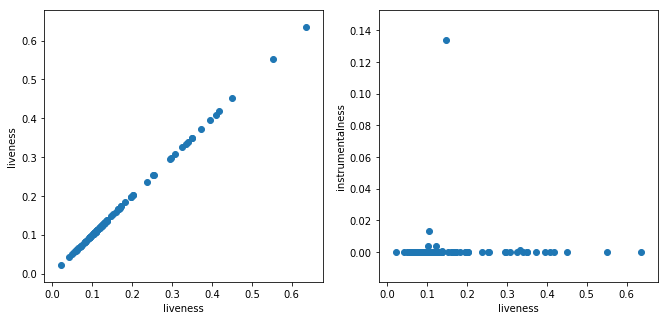

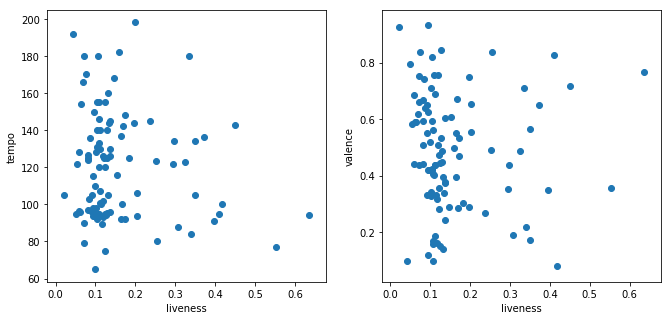

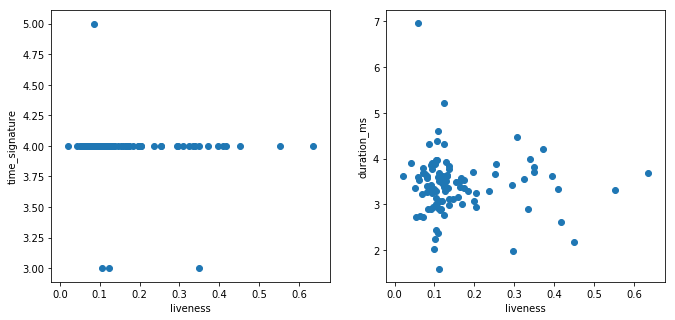

valence


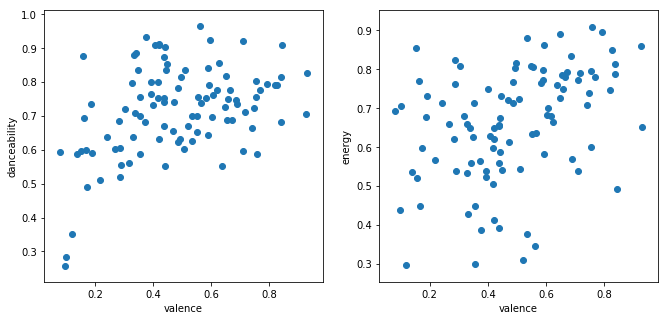

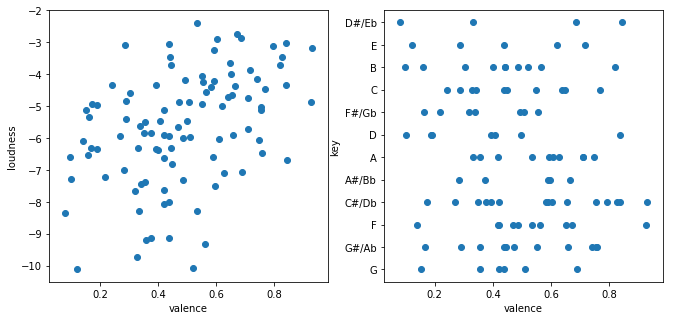

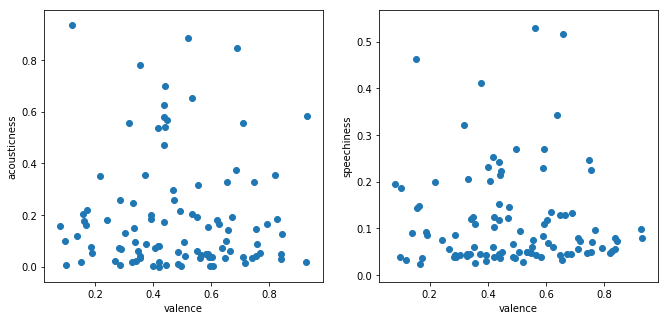

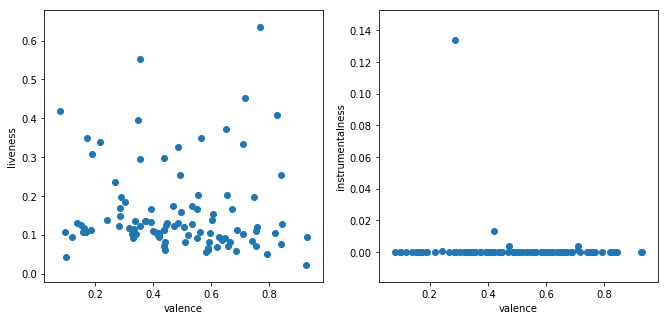

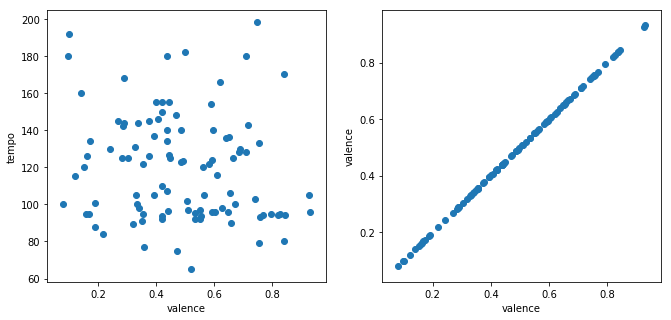

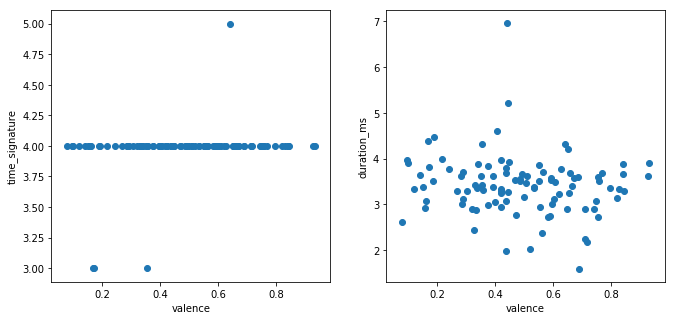

tempo


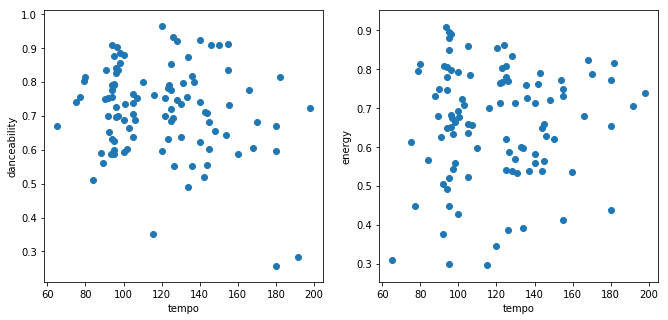

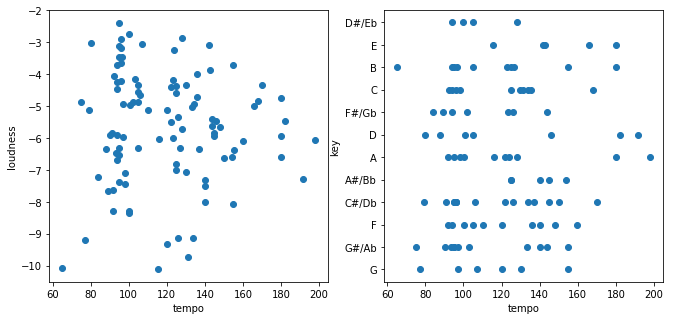

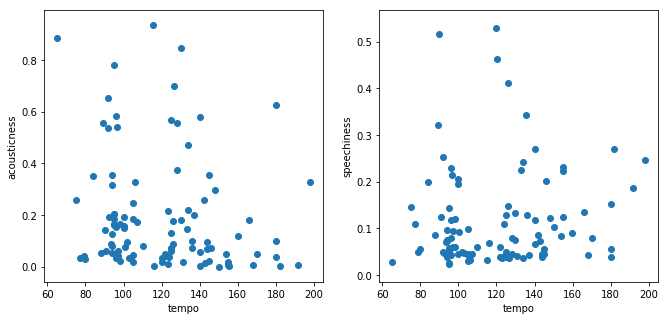

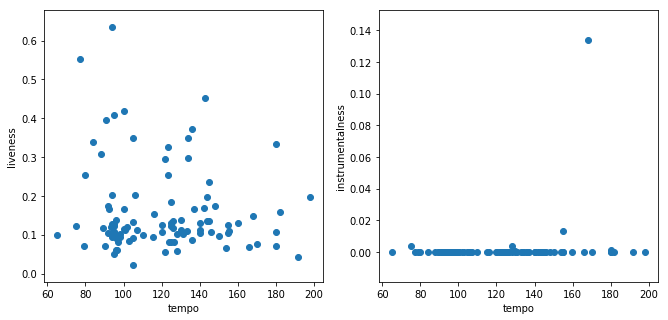

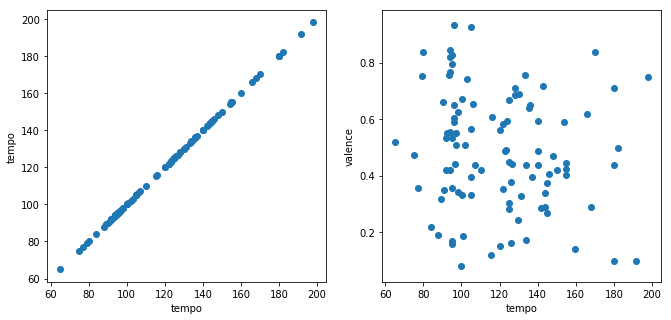

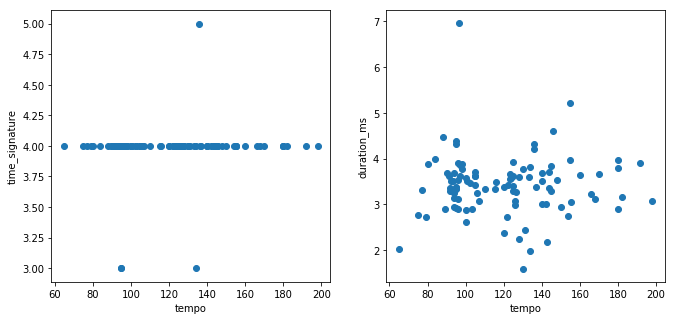

duration_ms


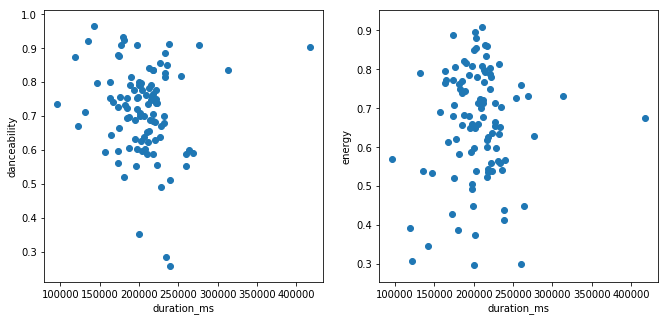

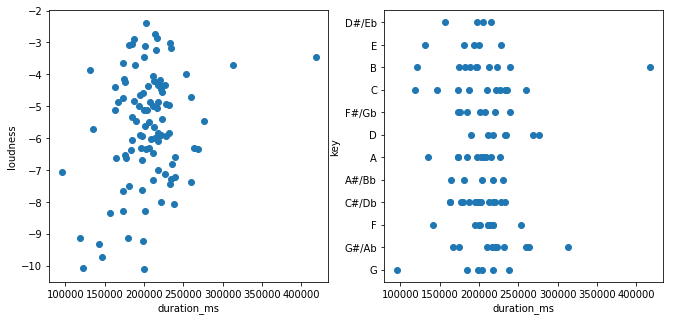

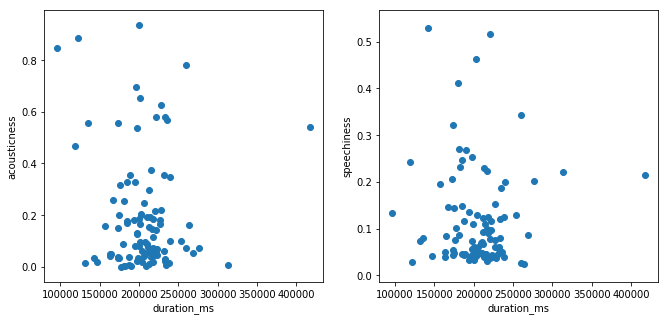

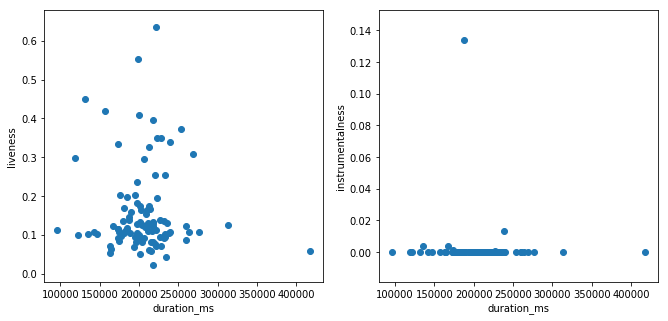

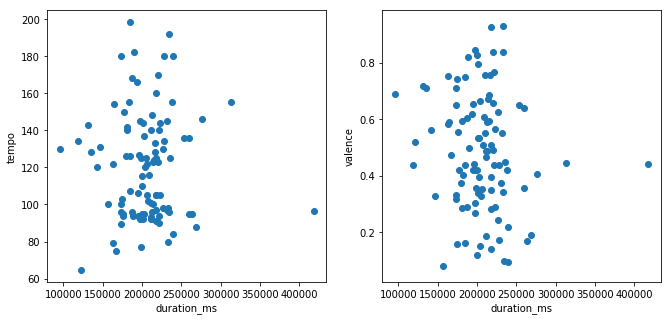

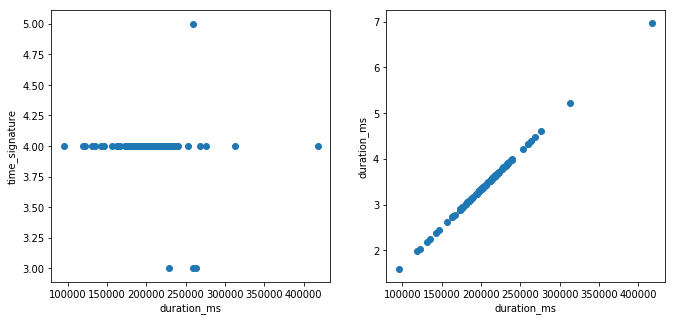

time_signature


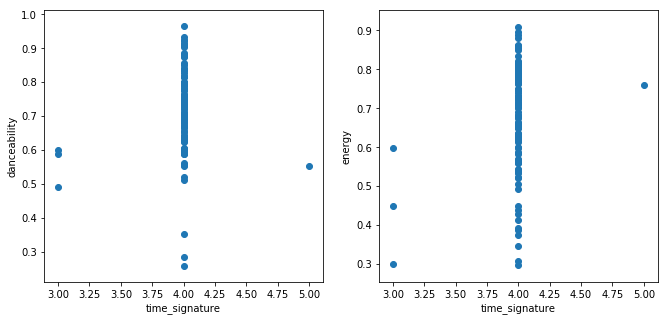

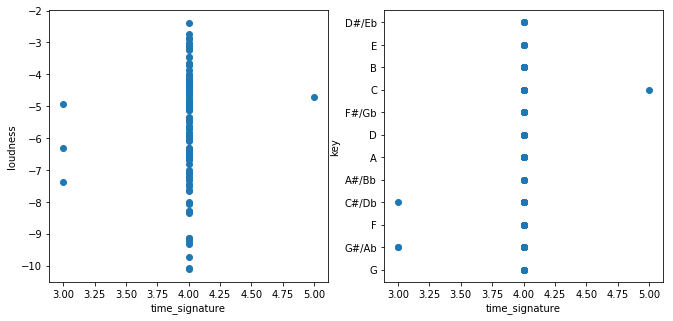

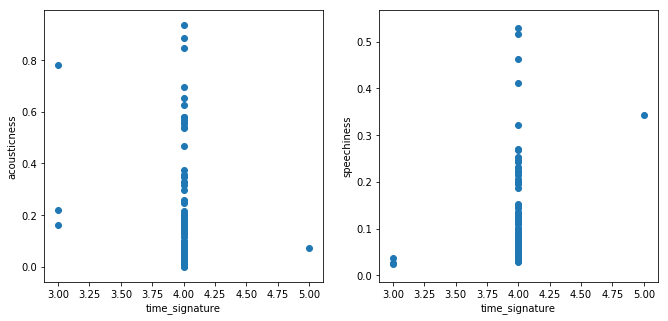

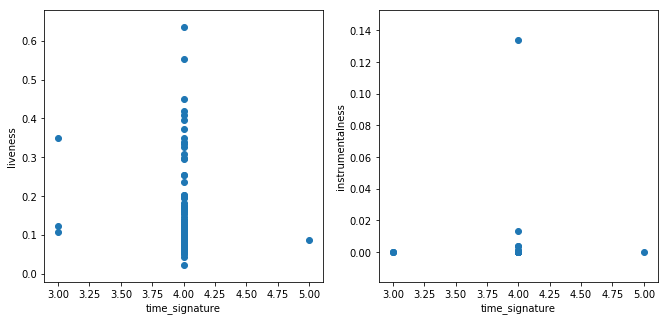

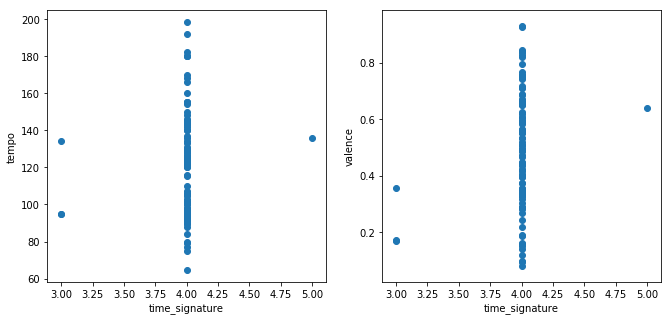

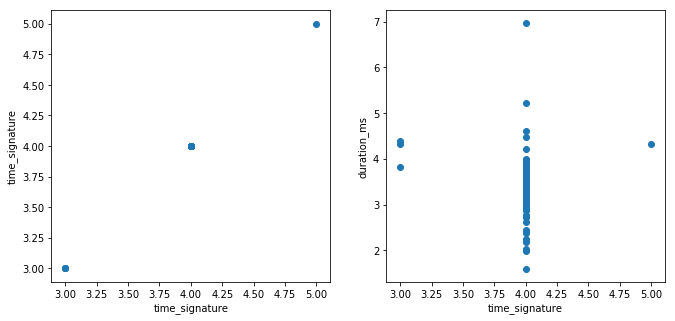

In [32]:
for name in columns:
    print(name)
    col_scatter(name)

In the above section I made scatter plots for each combination of audio features to see which ones had the most significant relationship. The function could probably be written more elegantly, but I decided to write it out the way I knew how in the moment.  

# Question 1: 
What artists have the most songs in Spoitfy's top 100 played list?

**Answer:** XXXTENTACION and Post Malone each have 6 songs in the top 100 which is the most. Next is Drake with 4, Ed Sheeran and Marshmello at 3. 13 Artists have 2 and the rest have 1

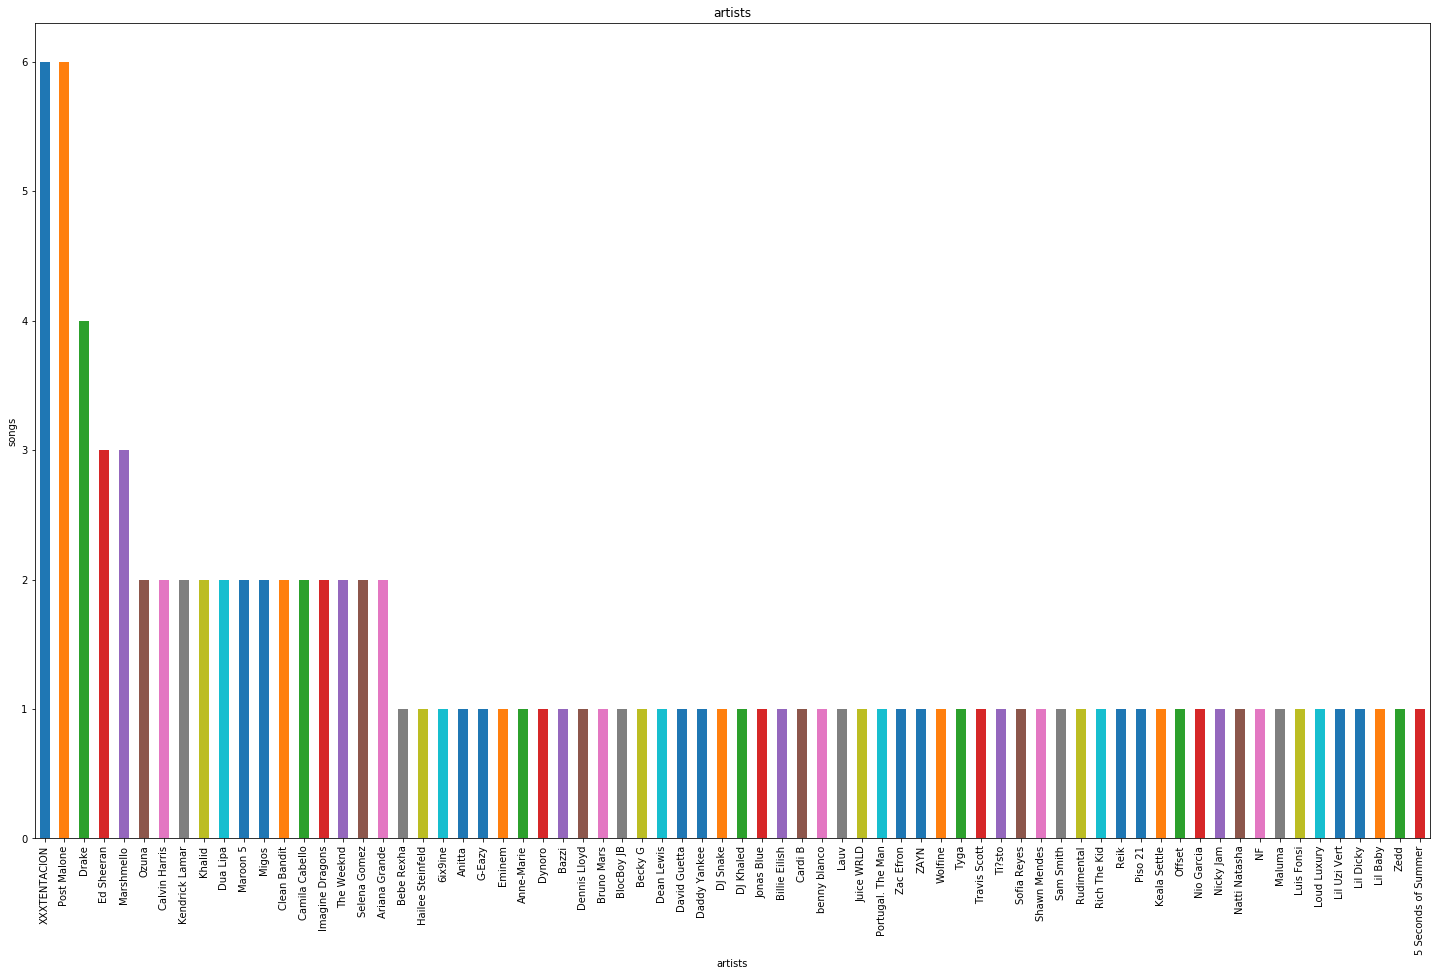

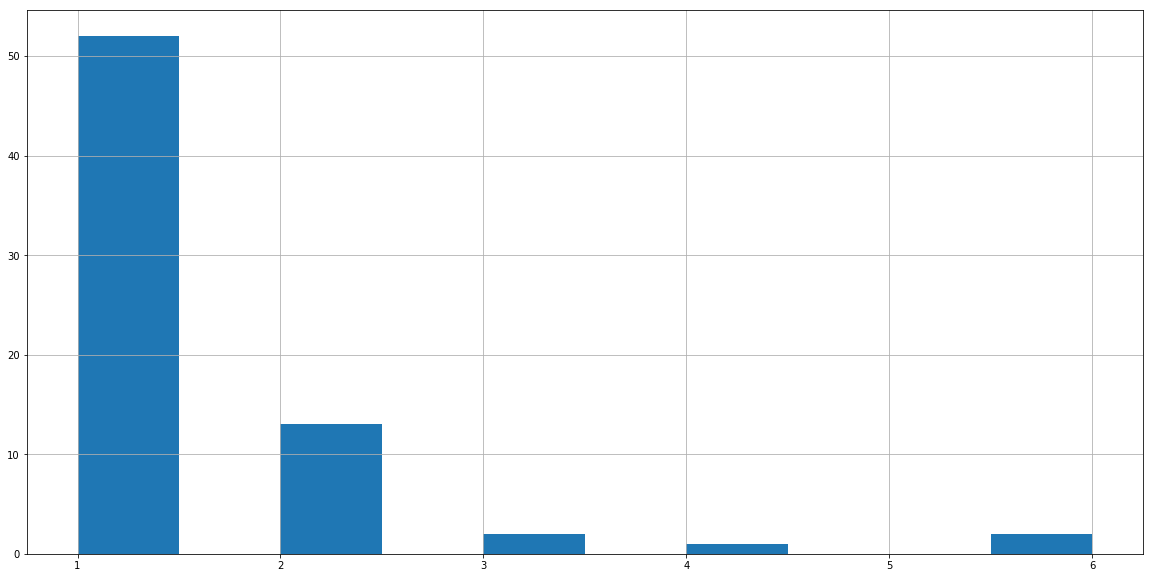

artists
XXXTENTACION        6
Post Malone         6
Drake               4
Ed Sheeran          3
Marshmello          3
Ozuna               2
Calvin Harris       2
Kendrick Lamar      2
Khalid              2
Dua Lipa            2
Maroon 5            2
Migos               2
Clean Bandit        2
Camila Cabello      2
Imagine Dragons     2
The Weeknd          2
Selena Gomez        2
Ariana Grande       2
Bebe Rexha          1
Hailee Steinfeld    1
Name: name, dtype: int64

In [34]:
analysis('artists')

# Question 2: 
What songs have the highest and lowest rating by audio feature?

**Answer:** 


In [33]:
df.columns

Index(['name', 'artists', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

In [63]:
my_array = np.array([['Yes Indeed  Lil Baby', 'Nice For What   Drake', 'FRIENDS  Marshmello',
                     'Yes Indeed  Lil Baby', 'lovely (with Khalid)  Billie Eilish',
                     'Thunder  Imagine Dragons', 'Me Niego    Reik', 'Shape of You  Ed Sheeran',
                     'Coraz?n (feat. Nego do Borel)  Maluma', 'Te Bot? - Remix  Nio Garcia',
                     'No Brainer  DJ Khaled'], ['Dusk Till Dawn - Radio Edit    ZAYN', 'lovely (with Khalid)  Billie Eilish',
                     'Perfect  Ed Sheeran', 'HUMBLE.  Kendrick Lamar', 'multi', 'Finesse (Remix) [feat. Cardi B]  Bruno Mars',
                     'Nevermind  Dennis Lloyd', 'changes  XXXTENTACION', 'Everybody Dies In Their Nightmares  XXXTENTACION',
                     'multi']])

ratings = pd.DataFrame(my_array)
ratings

ratings.columns = ['danceability', 'energy', 'loudness',
                 'speechiness', 'acousticness', 'instrumentalness',
                 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']

ratings
# ratings.index = ['max', 'min']

# ratings

# for i in columns:
#     print(i)
#     stats(i)


ValueError: Length mismatch: Expected axis has 1 elements, new values have 11 elements

in the above I was trying to display a dataframe with each of the audio feature and the min and max values, but hit a bit of a snag in the code.

# Question 3: 
Are there any audio features that seem to represent a strong linear or non-linear relationship with each other and if so what are they? 

**Answer:** There were not many scatter plots that suggested a strong, positive or negative, linear relationship. The Danceability and Valance shows what looks like a non-linear relationship, but a positive medium strength one. Loundness and Energy seems to have the strongest linear, positive relationship out of the data. 

I still need to work through a statisitcal problem to solve for the report although I'm unsure of this part. I would imagine using of the the two scatter plots that had a strong relationship, but from there I'm really not sure how to calculate probability from that. 


# Further Research